Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Reading the Csv file

In [2]:
df=pd.read_csv('Water_quality.csv',sep=';')

Display the csv data

In [3]:
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [4]:
df.shape

(2861, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [6]:
df.describe()

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


Total number of null_values in the given dataset

In [8]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

Changing the data type of the date column

In [9]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [10]:
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [11]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

Changing the Null values with the mean of the particular column

In [12]:
df['NH4']=df['NH4'].fillna(df['NH4'].mean())
df['BSK5']=df['BSK5'].fillna(df['BSK5'].mean())
df['Suspended']=df['Suspended'].fillna(df['Suspended'].mean())
df['O2']=df['O2'].fillna(df['O2'].mean())
df['PO4']=df['PO4'].fillna(df['PO4'].mean())
df['NO3']=df['NO3'].fillna(df['NO3'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['SO4']=df['SO4'].fillna(df['SO4'].mean())
df['PO4']=df['PO4'].fillna(df['PO4'].mean())
df['CL']=df['CL'].fillna(df['CL'].mean())

In [13]:
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


Check for still any null_values

In [14]:
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64

Droping the duplicate values

In [15]:
df=df.drop_duplicates()
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


Importing matplotlib module

In [16]:
import matplotlib.pyplot as plt

In [17]:
df['NH4']

0       0.330
1       0.044
2       0.032
3       0.170
4       0.000
        ...  
2856    0.046
2857    0.000
2858    0.034
2859    0.000
2860    0.000
Name: NH4, Length: 2861, dtype: float64

In [18]:
df['BSK5']

0       2.77
1       3.00
2       2.10
3       2.23
4       3.03
        ... 
2856    2.69
2857    1.52
2858    0.29
2859    2.10
2860    1.78
Name: BSK5, Length: 2861, dtype: float64

Bar graph between the NH4 VS BSK5

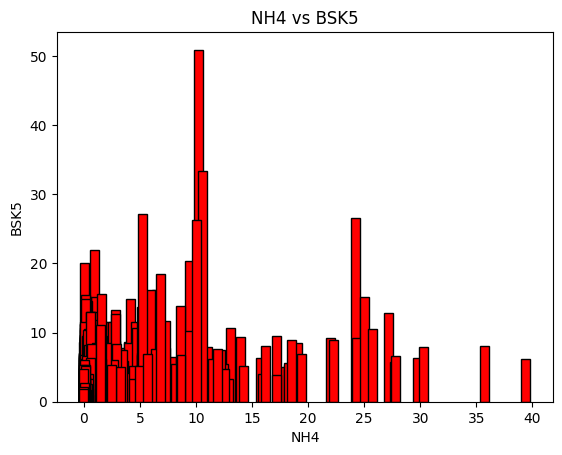

In [19]:
plt.bar(df['NH4'],df['BSK5'],color='red',edgecolor='black')
plt.xlabel('NH4')
plt.ylabel('BSK5')
plt.title('NH4 vs BSK5')
plt.show()